In [2]:
import pandas as pd

Reading the csv with data from 2014 to 2019

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/DATA_1/A16_19_export.csv', error_bad_lines=False,engine='python')

imported


In [ ]:
df

,timestamp,text
0,2019-05-27 11:49:14+00,È appena uscito un nuovo video! LES CRYPTOMONN...
1,2019-05-27 11:49:18+00,Cardano: Digitize Currencies; EOS https://t.co...
2,2019-05-27 11:49:06+00,Another Test tweet that wasn't caught in the s...
3,2019-05-27 11:49:22+00,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4,2019-05-27 11:49:23+00,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...
...,...,...
20165008,2019-11-23 15:28:50+00,Happy #FibonacciDay \n\nA while back I created...
20165009,2019-11-23 15:45:55+00,Bitcoin Suisse Certificates :) https://t.co/nd...
20165010,2019-11-23 15:45:56+00,Register now for the early access of the Codug...
20165011,2019-11-23 15:45:57+00,@btc \n@btc \nDo you know that BTC Baskets isn...


Defining the NLP (polarity score) function with TextBlob lib

In [ ]:
from textblob import TextBlob as tb
#defining the function that will calculate the polarity score of a given text item - tweet
def calculate_polarity(tweet):
    analysis = tb(tweet)
    out=analysis.sentiment.polarity
    
    return out
#defining the list for the function output items
sent=[]

Iterating over the text of tweets in dataframe, calculating the sentiment and appending the output.
Dropping the text column as it is not needed anymore.
Replacing it with sentiment score data.


In [ ]:
for item in df["text"]:
  str_fr=str(item)
  sent.append(calculate_polarity(str_fr))

df=df.drop(["text"], axis=1)
print(len(sent))
df["sentiment"]=sent

df.to_csv(r"/content/drive/MyDrive/Colab Notebooks/DATA_1/A_16_19_sent.csv",index=False)
print("saved")

20165013
saved


Re-reading the files for the purpose of my not so fast laptop which was crashing constantly...

In [3]:
df2 = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/DATA_1/A_16_19_sent.csv',engine='python')

In [4]:
df2

,timestamp,sentiment
0,2019-05-27 11:49:14+00,0.000000
1,2019-05-27 11:49:18+00,0.000000
2,2019-05-27 11:49:06+00,0.000000
3,2019-05-27 11:49:22+00,0.000000
4,2019-05-27 11:49:23+00,0.000000
...,...,...
20165008,2019-11-23 15:28:50+00,0.188226
20165009,2019-11-23 15:45:55+00,0.500000
20165010,2019-11-23 15:45:56+00,0.100000
20165011,2019-11-23 15:45:57+00,0.240625


Splitting the timestamp to extract date.

In [5]:
df2[['date', 'time']] = df2['timestamp'].str.split(' ', 1, expand=True)

Reading Stock data:

In [6]:
prices=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA_1/BTC-USD.csv", engine='python')
prices = prices[['Date', 'Close']]

Mapping stock data to the dates in previous df:

In [7]:
df_merged=df2.merge(prices, left_on='date', right_on="Date", how='left')

In [8]:
df_merged

,timestamp,sentiment,date,time,Date,Close
0,2019-05-27 11:49:14+00,0.000000,2019-05-27,11:49:14+00,2019-05-27,8805.778320
1,2019-05-27 11:49:18+00,0.000000,2019-05-27,11:49:18+00,2019-05-27,8805.778320
2,2019-05-27 11:49:06+00,0.000000,2019-05-27,11:49:06+00,2019-05-27,8805.778320
3,2019-05-27 11:49:22+00,0.000000,2019-05-27,11:49:22+00,2019-05-27,8805.778320
4,2019-05-27 11:49:23+00,0.000000,2019-05-27,11:49:23+00,2019-05-27,8805.778320
...,...,...,...,...,...,...
20165008,2019-11-23 15:28:50+00,0.188226,2019-11-23,15:28:50+00,2019-11-23,7397.796875
20165009,2019-11-23 15:45:55+00,0.500000,2019-11-23,15:45:55+00,2019-11-23,7397.796875
20165010,2019-11-23 15:45:56+00,0.100000,2019-11-23,15:45:56+00,2019-11-23,7397.796875
20165011,2019-11-23 15:45:57+00,0.240625,2019-11-23,15:45:57+00,2019-11-23,7397.796875


Creating new df & cleaning the data:

In [9]:
dates=[]
sentiments=[]
prices=[]

for i in df_merged["date"]:
  dates.append(str(i))
for i in df_merged["sentiment"]:
  sentiments.append(float(i))
for i in df_merged["Close"]:
  prices.append(float(i))

sentiments

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.1,
 0.05,
 0.0,
 1.0,
 0.3,
 0.5989583333333333,
 0.0,
 0.0,
 0.1481818181818182,
 0.0,
 0.0,
 0.0249999999999999,
 -0.0333333333333333,
 0.5208333333333333,
 0.25,
 0.0,
 0.0,
 0.221875,
 0.0,
 0.0,
 0.0,
 0.125,
 0.0,
 0.6,
 0.2431818181818181,
 -0.1041666666666666,
 0.0,
 0.0,
 0.09375,
 0.0,
 0.0,
 0.4125,
 0.0787878787878787,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2321428571428571,
 0.0,
 0.0,
 0.5,
 0.1363636363636363,
 0.1833333333333333,
 0.4,
 0.2,
 0.0,
 0.6,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.08,
 0.1,
 0.0,
 0.0,
 0.91,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0533333333333333,
 0.8,
 0.0,
 0.0,
 0.3833333333333333,
 0.5,
 0.5,
 0.0,
 0.5,
 0.16,
 0.0,
 0.0,
 0.0,
 0.7,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.05,
 0.25,
 0.0672727272727272,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.25,
 0.0,
 0.29375,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.4125,
 0.0,
 0.1704545454545454,
 0.0,
 0.0,
 0.0,
 0.8,
 0.0,
 0.0,
 0.6,
 0.0,
 0.8,
 0.2

In [10]:
test_one=pd.DataFrame()
test_one["dates"]=dates
test_one["prices"]=prices
test_one["sentiment"]=sentiments

Grouping by the days and calculating mean score of tweet sentiments for each day from 2014 to 2019:

In [11]:
toexport=test_one.groupby(["dates", "prices"]).agg({"sentiment":"mean"})

In [12]:
toexport

,,sentiment
dates,prices,
2014-09-17,457.334015,0.011888
2014-09-18,424.440002,0.010501
2014-09-19,394.795990,0.004012
2014-09-20,408.903992,0.011305
2014-09-21,398.821014,0.003570
...,...,...
2019-11-19,8206.145508,0.089850
2019-11-20,8027.268066,0.102093
2019-11-21,7642.750000,0.093717


Re-reading to reset headers:

In [14]:
toexport.to_csv("/content/drive/MyDrive/Colab Notebooks/DATA_1/dane_14_19.csv")

In [15]:
csv1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA_1/dane_14_19.csv")

In [17]:
csv1

,dates,prices,sentiment
0,2014-09-17,457.334015,0.011888
1,2014-09-18,424.440002,0.010501
2,2014-09-19,394.795990,0.004012
3,2014-09-20,408.903992,0.011305
4,2014-09-21,398.821014,0.003570
...,...,...,...
1889,2019-11-19,8206.145508,0.089850
1890,2019-11-20,8027.268066,0.102093
1891,2019-11-21,7642.750000,0.093717
1892,2019-11-22,7296.577637,0.081691


Reading another batch of data from 2021 to 2022, which was calculated the same way as above:

In [18]:
csv2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA_1/TESTOWE.csv")

In [19]:
csv2

,dates,prices,sentiment
0,2021-02-05,38144.308594,0.103597
1,2021-02-06,39266.011719,0.118378
2,2021-02-07,38903.441406,0.155662
3,2021-02-08,46196.464844,0.112163
4,2021-02-09,46481.105469,0.106261
...,...,...,...
209,2022-11-14,16618.199219,0.114216
210,2022-11-15,16884.613281,0.105882
211,2022-11-16,16669.439453,0.097629
212,2022-11-20,16291.832031,0.073256


Appending the dataframes together

In [23]:
csv3=csv1.append(csv2, ignore_index=True)

In [24]:
csv3

,dates,prices,sentiment
0,2014-09-17,457.334015,0.011888
1,2014-09-18,424.440002,0.010501
2,2014-09-19,394.795990,0.004012
3,2014-09-20,408.903992,0.011305
4,2014-09-21,398.821014,0.003570
...,...,...,...
2103,2022-11-14,16618.199219,0.114216
2104,2022-11-15,16884.613281,0.105882
2105,2022-11-16,16669.439453,0.097629
2106,2022-11-20,16291.832031,0.073256


Calculating correlation matrix between the price of cryptocurrency and twitter sentiments:

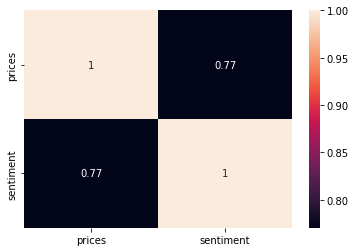

In [25]:
import seaborn as sn
corr_matrix = csv3.corr()
sn.heatmap(corr_matrix, annot=True)

Correlation seems to be high. Stay tuned for the updates B)

In [26]:
csv3.to_csv("/content/drive/MyDrive/Colab Notebooks/DATA_1/final_data_master.csv")